<a href="https://colab.research.google.com/github/leoliu5550/colab_for_nn_homework/blob/master/nn__classification_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用NN進行分類

In [84]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

## 建立數據集

In [85]:
n_data = torch.ones(100, 2)      #數據的基本型態，建立一個全部為1的張量，[1,1]*100個
x0 = torch.normal(2*n_data, 1)     # 類別0 x data (tensor), shape=(100, 2) 中心為2,std為1
y0 = torch.zeros(100)          # 類別0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)    # 類別1 x data (tensor), shape=(100, 2)  中心為-2,std為1
y1 = torch.ones(100)          # 類別1 y data (tensor), shape=(100, )

# 注意 x, y 數據的數據形式是一定要像下面一樣 (torch.cat 是在合並數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating 將兩組數據直的接起來
y = torch.cat((y0, y1), 0).type(torch.LongTensor)    # LongTensor = 64-bit integer 將兩組數據直的接起來


###數據分布情況

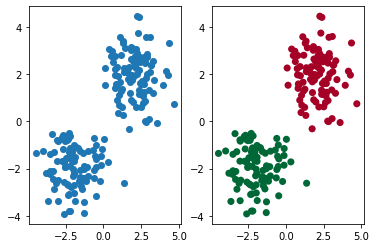

In [86]:
# 觀察數據分佈情況
plt.subplot(1, 2, 1)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1],s=50,  lw=0, cmap='RdYlGn')
plt.subplot(1, 2, 2)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1],c=y.data.numpy(),s=50,  lw=0, cmap='RdYlGn')
plt.show()

##建立神經網路

In [98]:
class Net(torch.nn.Module):
  def __init__(self,n_feature,n_hidden,n_output):
    super(Net,self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)#隱藏層
    self.out = torch.nn.Linear(n_hidden, n_output)#輸出層

  def forward(self,x):
    x = F.relu(self.hidden(x))   #節點的激勵函數
    x = self.out(x)
    return x


In [94]:
net=Net(n_feature=2, n_hidden=10, n_output=2) #[2,2,1] [-2,-2,0]
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


In [99]:
##快速搭建法
net2=torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [95]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.01) #類神經更新權重的優化器，給入權重、學習率

loss_func = torch.nn.CrossEntropyLoss()       #計算損失的函數


## 開始訓練

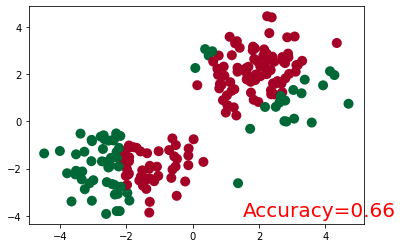

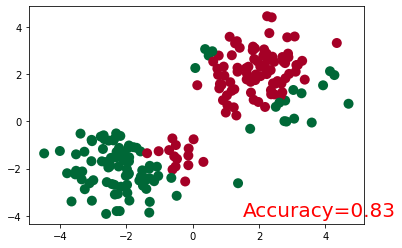

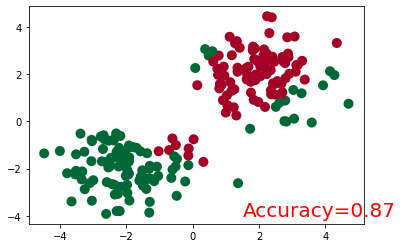

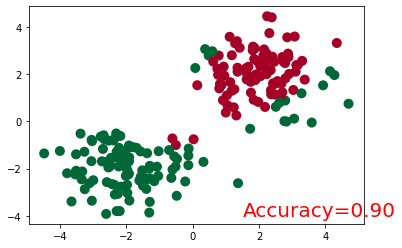

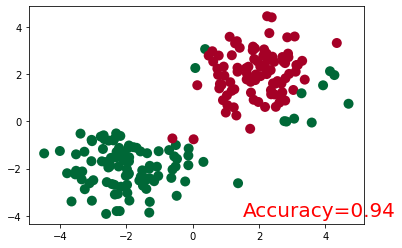

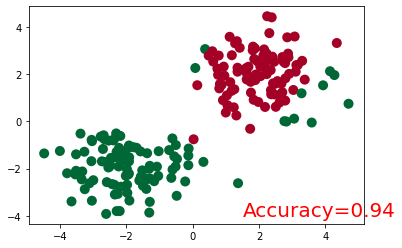

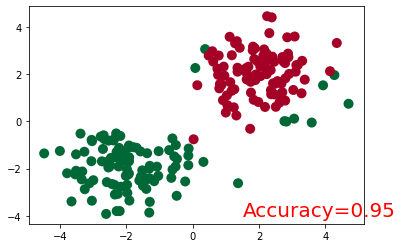

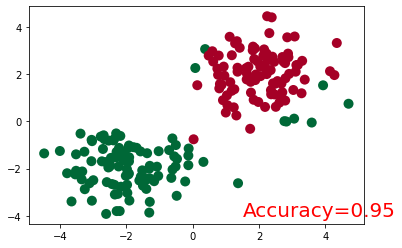

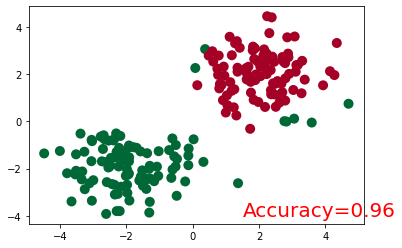

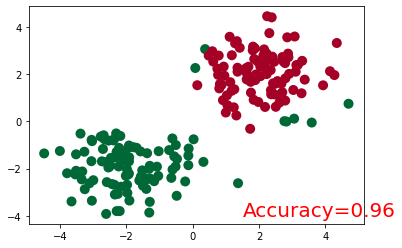

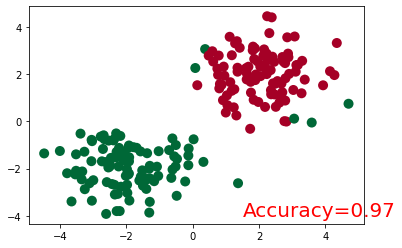

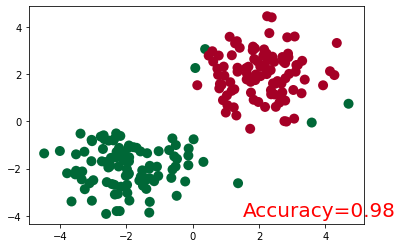

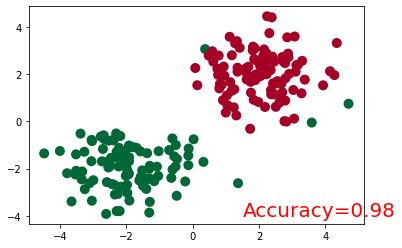

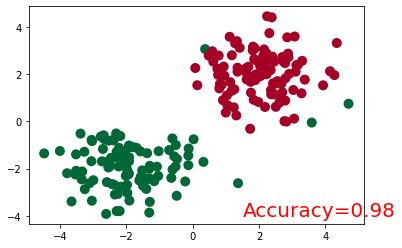

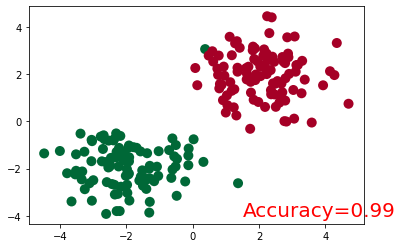

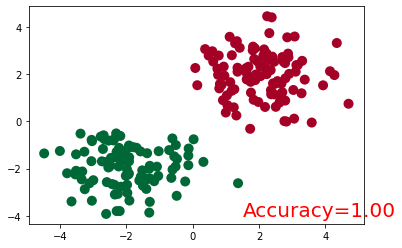

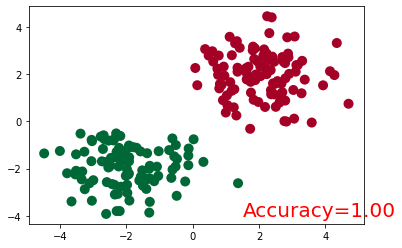

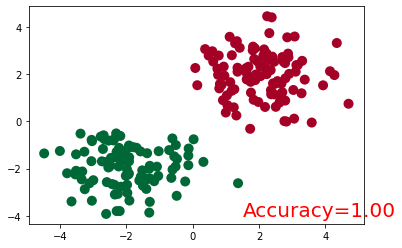

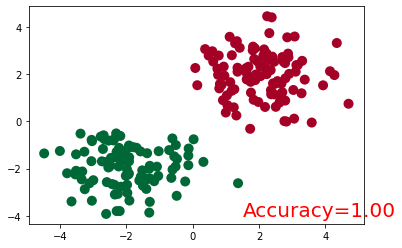

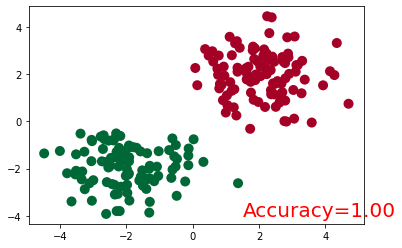

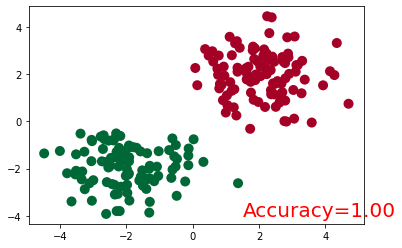

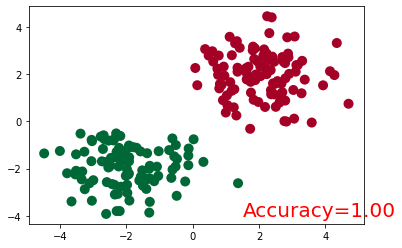

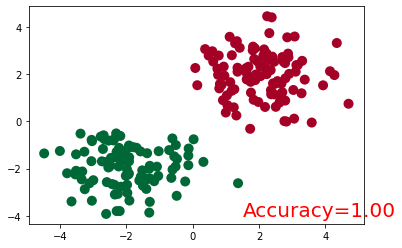

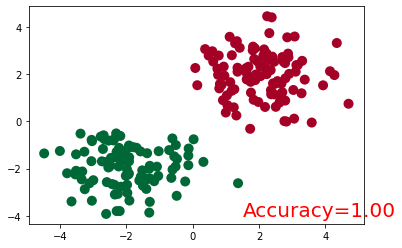

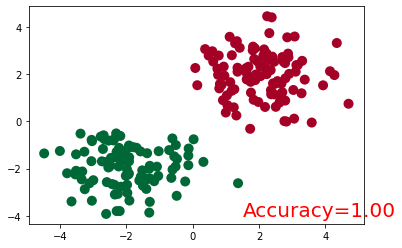

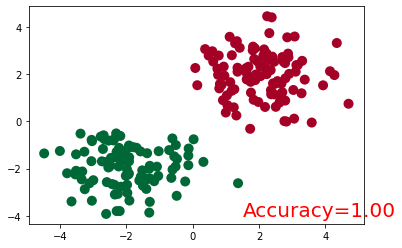

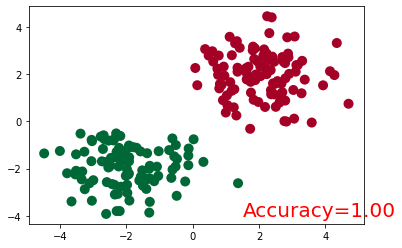

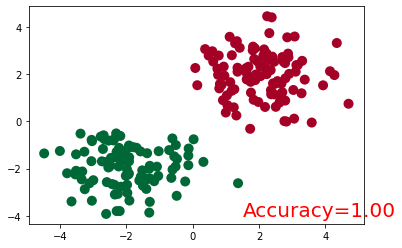

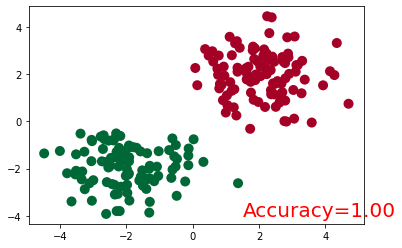

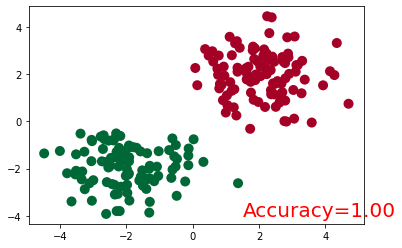

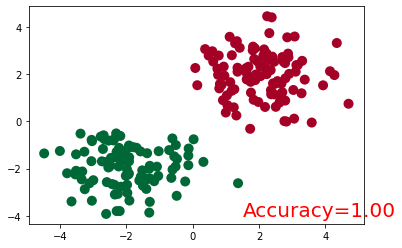

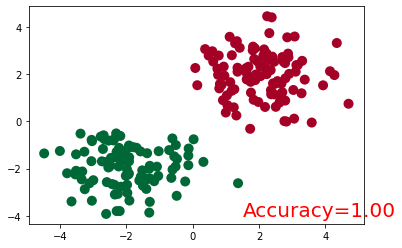

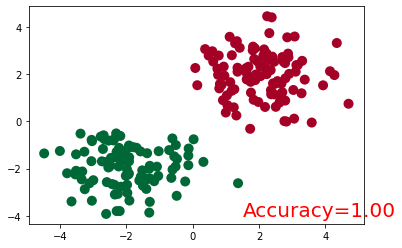

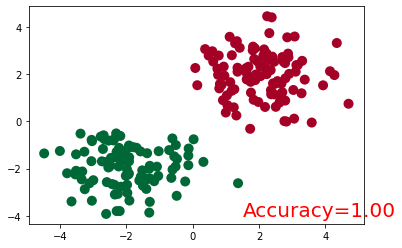

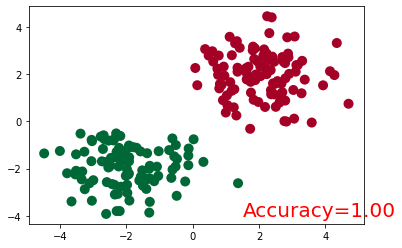

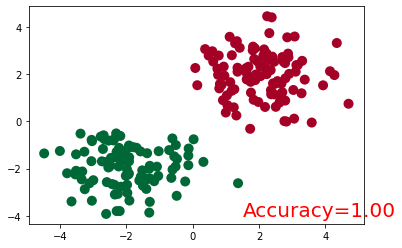

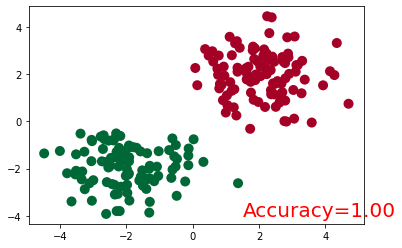

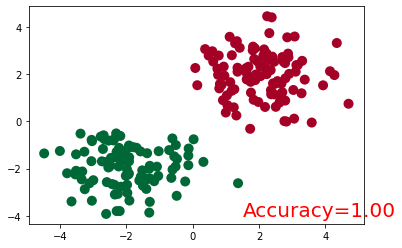

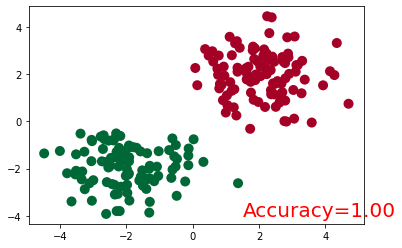

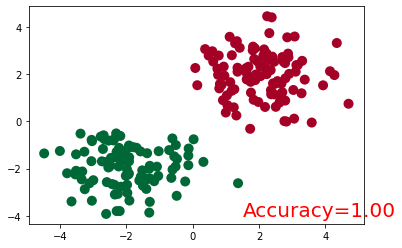

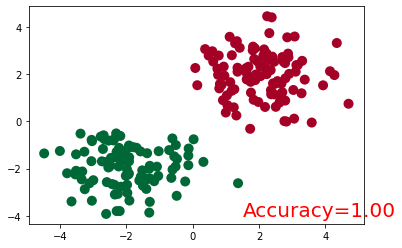

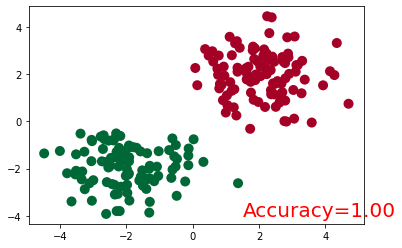

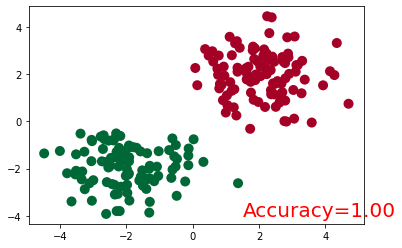

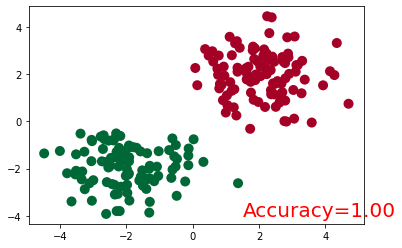

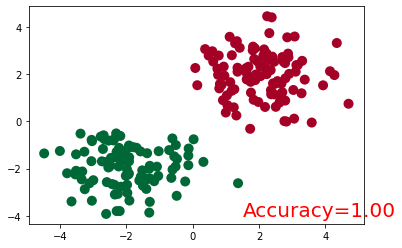

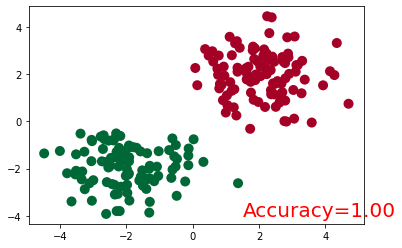

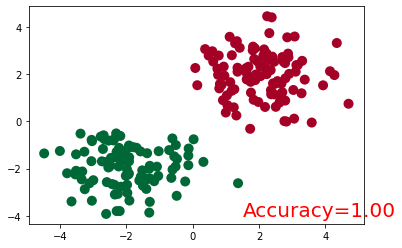

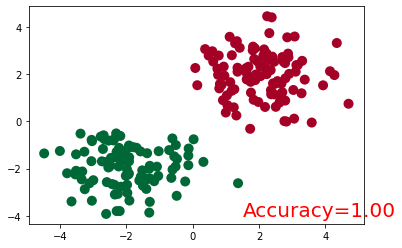

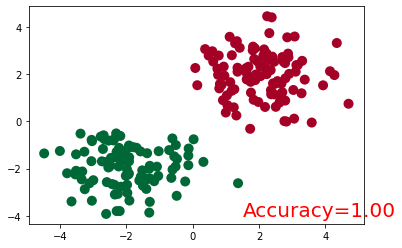

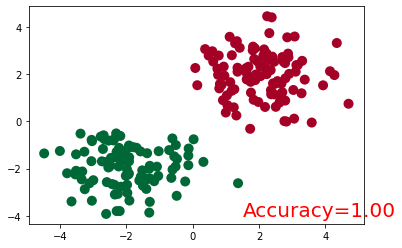

In [96]:
plt.ion()
for t in range(100):
  out = net(x) #輸入X,輸出預測
  loss = loss_func(out,y) #計算預測和實際誤差

  optimizer.zero_grad()  #清除上一次訓練的權重
  loss.backward()     #將誤差回傳給各個節點
  optimizer.step()     #更新權重
  if t % 2 == 0:
    # plot and show learning process
    plt.cla()
    prediction = torch.max(out, 1)[1]
    pred_y = prediction.data.numpy()
    target_y = y.data.numpy()
    plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
    plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)

plt.ioff()
plt.show()